In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

Matplotlib created a temporary config/cache directory at /var/folders/73/0j93mrvd1s77hv6p1fbfrqz80000gn/T/matplotlib-omchwjym because the default path (/Users/anatlevari/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


# Understand the dataset

In this notebook, the dataset of heartfailure is examined, before the classification task (found on the notebook "Heart Failure Classifiction").

In [2]:
df = pd.read_csv('/Users/anatlevari/Downloads/heart.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Data check

In [4]:
#Identify the Data Types - Numpy
df_dd = pd.DataFrame(df.dtypes,columns=['Numpy Dtype'])

#Identify the unique values
df_dd['Nunique'] = df.nunique()

#Identify the Missing values
df_dd['MissingValues']=df.isnull().sum()

# Identify the count for each variable
df_dd['Count']=df.count()

# Identify the zero values for each variable
df_dd['ZeroValues']=(df==0).sum()

df_dd

,Numpy Dtype,Nunique,MissingValues,Count,ZeroValues
Age,int64,50,0,918,0
Sex,object,2,0,918,0
ChestPainType,object,4,0,918,0
RestingBP,int64,67,0,918,1
Cholesterol,int64,222,0,918,172
FastingBS,int64,2,0,918,704
RestingECG,object,3,0,918,0
MaxHR,int64,119,0,918,0
ExerciseAngina,object,2,0,918,0
Oldpeak,float64,53,0,918,368


This shows that the data is clean and there are no missing values.

## Statistics 


In [5]:
df.describe() # Distribution of numerical features

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
df.describe(include=['O']) # Distribution of catagorial features

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
display(df.shape)

(918, 12)

## Univariant Analysis

### Heart Disease Examination

In [9]:
# find heartdeseas ratio 
num_heartdiseas = df[df['HeartDisease'] == 1].count()[0]
num_not_heartdiseas = df[df['HeartDisease'] == 0].count()[0]
number_of_samples = df.count()[0]

print('Number of samples having heart failure/ total number of samples:', num_heartdiseas, '/' ,number_of_samples)
print('Number of samples NOT having heart failure/ total number of samples:', num_not_heartdiseas, '/', number_of_samples)
print('The ratio - have/(not have):', 
         round((num_heartdiseas/number_of_samples) * 100, 2), '/', 
           round((num_not_heartdiseas/number_of_samples) * 100, 2))


Number of samples having heart failure/ total number of samples: 508 / 918
Number of samples NOT having heart failure/ total number of samples: 410 / 918
The ratio - have/(not have): 55.34 / 44.66


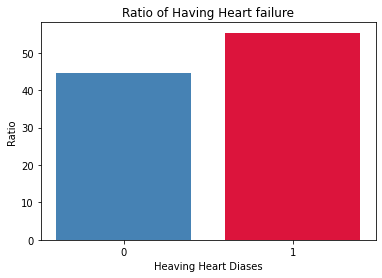

In [10]:
# plot the above ratio
ax = plt.bar(['0', '1'], 
          [round((num_not_heartdiseas/number_of_samples) * 100, 2), round((num_heartdiseas/number_of_samples) * 100, 2)],
           color = ['steelblue', 'crimson'])


plt.xlabel("Heaving Heart Diases")
plt.ylabel("Ratio")
plt.title("Ratio of Having Heart failure")

plt.show()

From the above calculation, one can see the data is not biased.

### Other numerical features examination

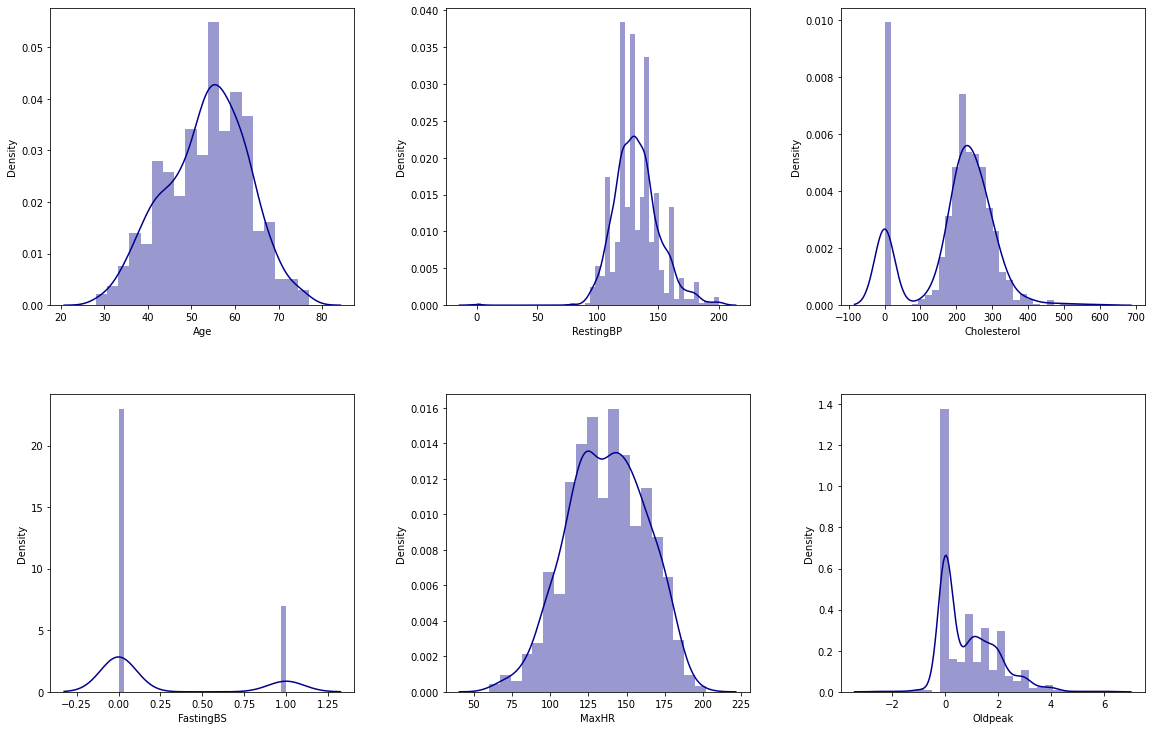

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8,5))

g = sns.distplot(df['Age'],ax=axes[0,0], color='darkblue')
g = sns.distplot(df['RestingBP'],ax=axes[0,1], color='darkblue')
g = sns.distplot(df['Cholesterol'],ax=axes[0,2], color='darkblue')
g = sns.distplot(df['FastingBS'],ax=axes[1,0], color='darkblue')
g = sns.distplot(df['MaxHR'],ax=axes[1,1], color='darkblue')
g = sns.distplot(df['Oldpeak'],ax=axes[1,2], color='darkblue')

plt.subplots_adjust(left=0.1, bottom=0.1, right=2, top=2, wspace=0.3, hspace=0.3)

### Distribution of catagorial features

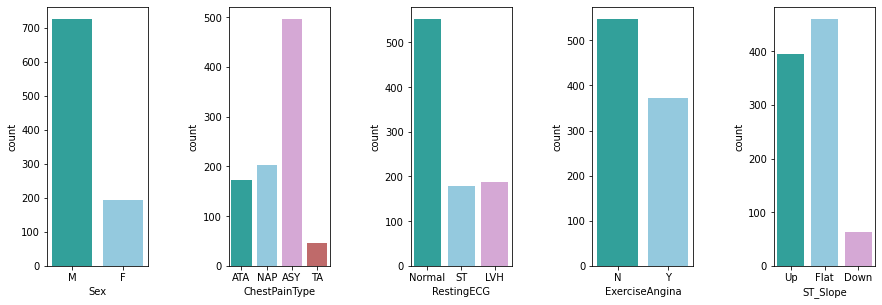

In [12]:
fig, axes = plt.subplots(ncols=5,figsize=(20,6))

g = sns.countplot(df["Sex"], ax=axes[0], palette = ['lightseagreen', 'skyblue'])
g = sns.countplot(df["ChestPainType"], ax=axes[1], palette = ['lightseagreen', 'skyblue', 'plum', 'indianred'])
g = sns.countplot(df["RestingECG"], ax=axes[2], palette = ['lightseagreen', 'skyblue', 'plum'])
g = sns.countplot(df["ExerciseAngina"], ax=axes[3], palette = ['lightseagreen', 'skyblue'])
g = sns.countplot(df["ST_Slope"], ax=axes[4], palette = ['lightseagreen', 'skyblue', 'plum'])

axes[0].plot()
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.7, top=0.7, wspace=0.8, hspace=None)


Insights:
Uneven distribution of the features. Mainly in:
- 'ChestPainType' - TA/ASY
- 'ST_Slope' - Flat/Down.

For later, need to verify these features distributed correctly in the classification process.


### Further lookout into the correlation of 'Sex' and 'having Heart Disease'

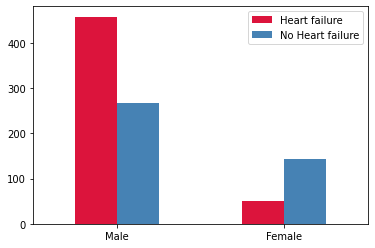

In [13]:
# creating sub data frame where the Male and Female colums are separated, according to HeartDisease
dfSvsHeart = df[['Sex', 'HeartDisease']]

Num_of_Positive_Male = dfSvsHeart[(dfSvsHeart['Sex'] == 'M') & (dfSvsHeart['HeartDisease'] == 1)].shape[0]
Num_of_Positive_Female = dfSvsHeart[(dfSvsHeart['Sex'] == 'F') & (dfSvsHeart['HeartDisease'] == 1)].shape[0]

Num_of_Negative_Male = dfSvsHeart[(dfSvsHeart['Sex'] == 'M') & (dfSvsHeart['HeartDisease'] == 0)].shape[0]
Num_of_Negative_Female = dfSvsHeart[(dfSvsHeart['Sex'] == 'F') & (dfSvsHeart['HeartDisease'] == 0)].shape[0]

Positive = [Num_of_Positive_Male, Num_of_Positive_Female]
Negative = [Num_of_Negative_Male, Num_of_Negative_Female]

index = ['Male', 'Female']
df4SvsHeart = pd.DataFrame({'Heart failure': Positive, 'No Heart failure': Negative}, index=index)

ax = df4SvsHeart.plot.bar(rot=0, color = ['crimson', 'steelblue'])

The higher ratio of heart disease in men observed above corresponds to the current research. 

### Further lookout into the correlation of 'Age' and 'having HeartDisease'

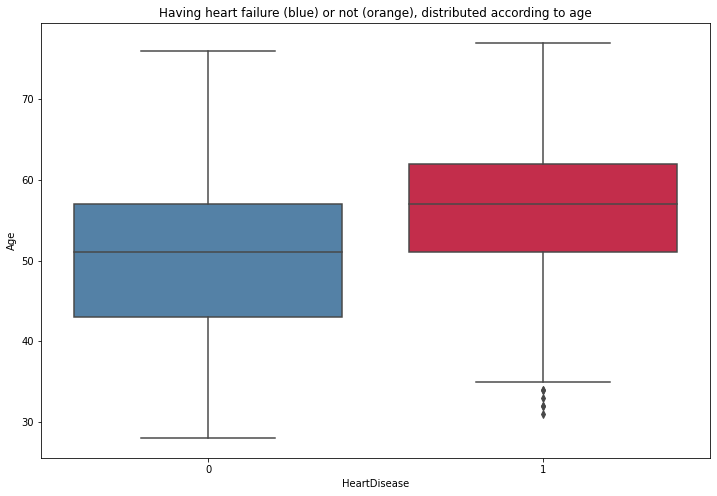

In [14]:
fig = plt.figure()
fig.set_size_inches(12, 8)
my_pal = ["orange", "blue"]
sns.boxplot( x='HeartDisease', y='Age', data=df, palette = ['steelblue', 'crimson'])
plt.title("Having heart failure (blue) or not (orange), distributed according to age")
plt.show()

From the above, the age of the group having heart failure is bigger, and tighter around the mean. This corresponds to the current research. 
Note that the average age of having heart failure is less than 60, which is younger that the average age in the  general population. This is due to the fact that this dataset is composed of samples of people who already have cardiovascular disease or at high cardiovascular risk and thus are prone to heart failure.

This relationship can be viewed also using histograms:

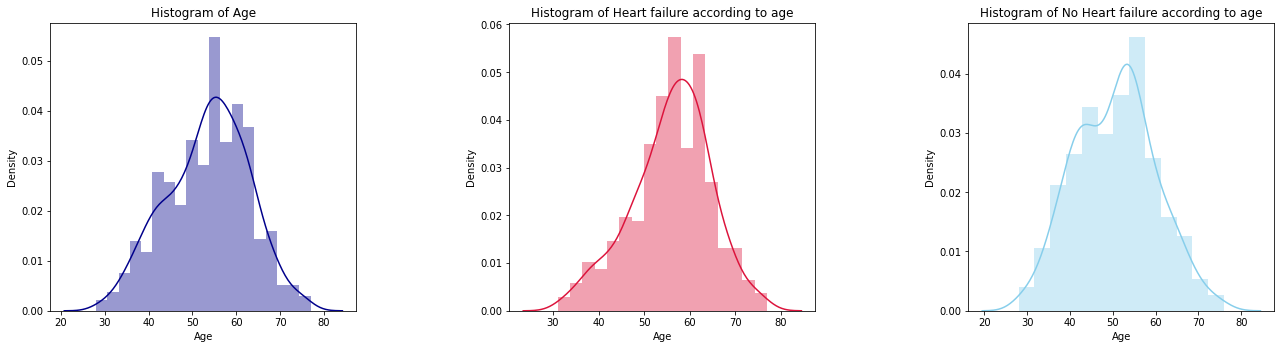

In [15]:
# histograms for the age/heartdeseas relashionship

fig, axes = plt.subplots(ncols=3, figsize=(10,5))


# creating new dataframes for each case
dfAgeHeart = df[['Age', 'HeartDisease']]
dfAge_has_HeartD = dfAgeHeart[dfAgeHeart['HeartDisease'] == 1]
dfAge_not_HeartD = dfAgeHeart[dfAgeHeart['HeartDisease'] == 0]

# histograms and density
g = sns.distplot(a=df['Age'], color = 'darkblue', ax=axes[0])
g = sns.distplot(a=dfAge_has_HeartD['Age'], color = 'crimson', ax=axes[1])
g = sns.distplot(a=dfAge_not_HeartD['Age'], color = 'skyblue', ax=axes[2])

# adjusting
axes[0].set_title('Histogram of Age')
axes[1].set_title('Histogram of Heart failure according to age')
axes[2].set_title('Histogram of No Heart failure according to age')
plt.subplots_adjust(left=0.1, bottom=0.8, right=1.8, top=1.6, wspace=0.5, hspace=None)

plt.show()




## Multivariate Analysis

We observe the correlation graphs between each two features. The plot also contains histograms on the diagonal.

<Figure size 432x288 with 0 Axes>

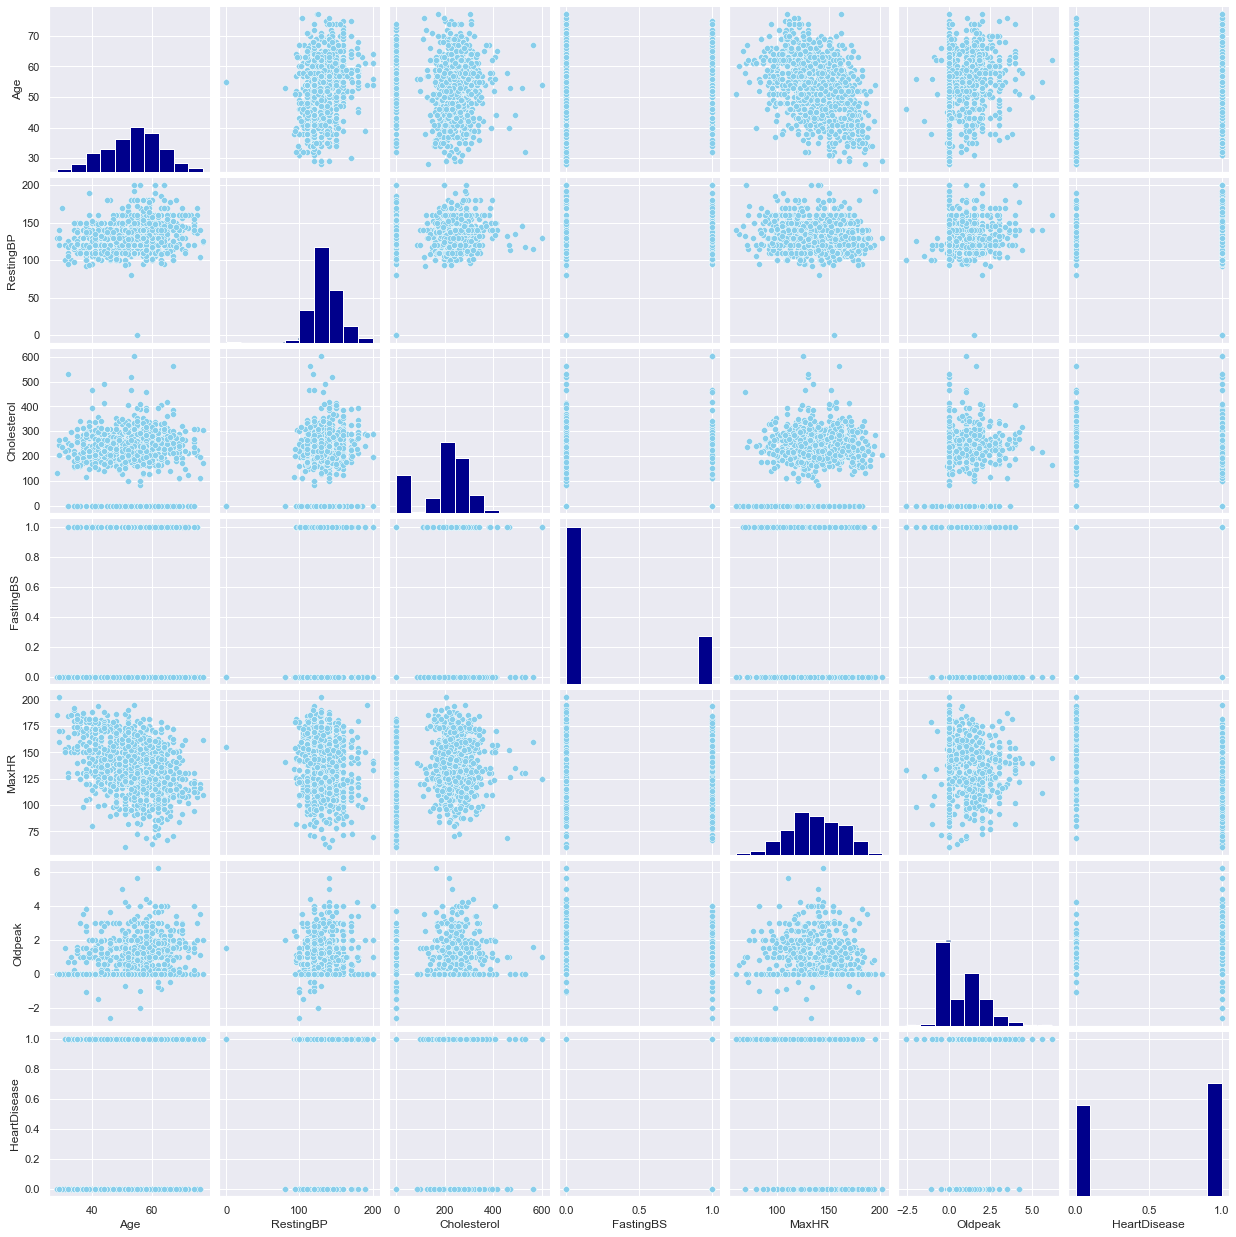

In [16]:
sns.set(palette="vlag")
fig2 = plt.figure()
fig.set_size_inches(10, 6)
sns.set()
cols = df.columns
g = sns.pairplot(df, height = 2.5, diag_kind="hist")
g.map_upper(sns.scatterplot, color='skyblue')
g.map_lower(sns.scatterplot, color='skyblue')
g.map_diag(plt.hist, color='darkblue')
    #plt.title(f"{day} - payment joint distributions")
plt.show();

We note that the maximal heart rate is higher when the age is younger, which imply negative correlation. 

### Heat map for having heart disease

Text(0.5, 1.0, 'correlation between different variables')

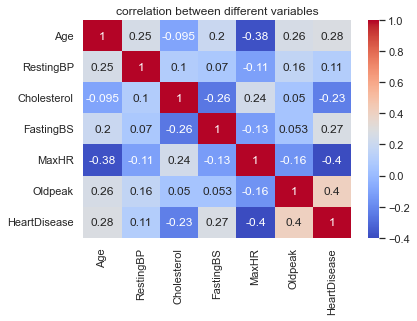

In [17]:
g = sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.title('correlation between different variables')

### Insights from the heatmap:
- No high correlation observed between two features, including 'heartdiseas' and the others.
- A small negative corelation between MaxHR and Age - as the age increase, maxHR (which is the maximal heart rate) decrease. This was viewed in the correlation diagram and is consistent with current research.
- A small negative correlation between MaxHR and HeartDisease. This means that as the maximal heart rate decrease, HeartDiseas increase, meaning there is a better chance of heaving a heart failure. As before, this is also observed in research. 

#### Correlation between 'HeartDisease' and two other variables - plotting heatmaps given the output of 'HeartDisease'
Given the value of 'HeartDisease', two heat maps are drawn. The purpose of this is to try find correlation between 3 features, 'HeartDisease' included. 

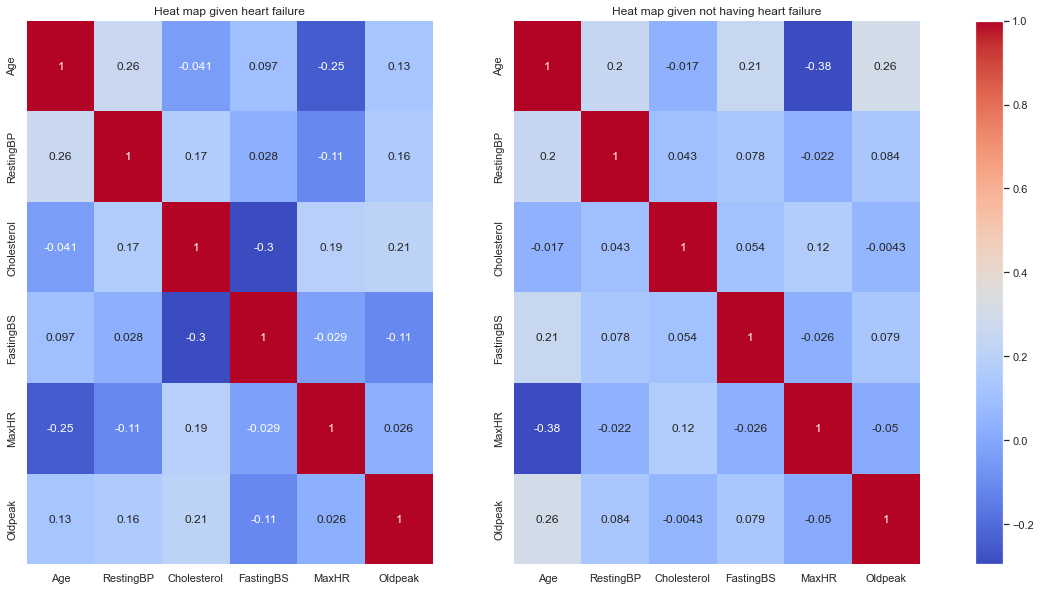

In [18]:
fig, ax =plt.subplots(1, 2, figsize=(20, 10))

# Heat map for having heartdeseas
dfHeartDiseas = df[df['HeartDisease'] == 1]
dfHeartDiseas = dfHeartDiseas.drop('HeartDisease', 1)
ax[0] = sns.heatmap(dfHeartDiseas.corr(), cmap="coolwarm", ax=ax[0], annot=True, cbar=False)
ax[0].set_title('Heat map given heart failure')


# Heat map for not having heartdeseas
dfNo_HeartDiseas = df[df['HeartDisease'] == 0]
dfNo_HeartDiseas = dfNo_HeartDiseas.drop('HeartDisease', 1)
ax[1] = sns.heatmap(dfNo_HeartDiseas.corr(), cmap="coolwarm", ax=ax[1], annot=True, cbar=False)
ax[1].set_title('Heat map given not having heart failure')
#plt.subplots_adjust(left=1, bottom=0.1, right=2, top=0.7, wspace=2, hspace=None)

# setting one color map 
mappable = ax[0].get_children()[0]
plt.colorbar(mappable, ax = [ax[0],ax[1]])

plt.show()



### Insights from the heatmaps:
1. As can be seen from the maps, given heart failure, there is a slight higher correlation between cholesterol and fastingBS. Higher from the first heatmap and much higher that the heatmap given there was no heart failure. This correlation means that as the cholesterol increase, there is higher chance of heaving lower blood suger after fasting (< 120 mg/dl). High blood suger after fasting is related to diabetes. The fact that this correlation is different between the different heatmaps can indicate the correlation between the three features. Having (or not) heart failure indicate if the cholesterol and FastingBS are correlated (or not). This negative correlation also consistence with the first heat map, as there, there is a small but positive correlation between FastingBS and HeartDisease, and negative correlation between each one of them and cholesterol.  
2. There is a differenc between the two heatmaps, in the correlation between Age and FastingBS. This imply a correlation between them and heart failure. Also, since the correlation between the two is higher in the absence of heart failure, this can imply that with no disease, as the age increase, there is a higher chance of blood suger > 120 mg/dl after fasting (i.e. diabetes). 
3. The negative correlation between MaxHR and age remain almost the same, in the absence of heart failure. When heart failure is presence, there is still a negative correlation, but smaller. This imply some correlation between the three features. A correlation between the maxHR and heart failure is also viewed in the regular heat map. 

# Conclusion 
To sum the observation, we can see that
1. The ratio of heaving and not heaving heart failure in the data in not bias (even though it is not completely even).
2. Men are more prone at heaving heart failure.
3. Heart failure is more probable as the age increase.
4. There is a small negative correlation between MaxHT and Age, MaxHR and HeartDisease and the three of them. 
5. There is a small negative correlation between FeastingBS, Cholesterol and HeartDisease.
6. There is a small negative correlation between FeastingBS, Age and HeartDisease.

Some of the observation above, like the connection with age and sex, are consistence with research. The other observations can imply some connection between heart failure and diabetes, Age, and maximal heart rate.  